##**ACTIVIDAD 1**
**Laura Carrera**

**Dana Cardenas**

# limpieza de datos

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [ ]:
!pip install wooldridge
import wooldridge as wd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 18.2 MB/s eta 0:00:00


In [ ]:
wage = pd.read_csv("/content/activity_1_ml.csv")

**DUPLICADOS**

In [ ]:
wage

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
547,3.00,0,9,male,NaN,0
548,7.63,0,8,female,single,4
549,4.50,0,36,female,married,6
550,NaN,0,28,male,married,3


*EXPLICITOS*

In [ ]:
wage.duplicated().sum()

17

In [ ]:
wage.drop_duplicates(inplace = True)
wage.reset_index(drop=True, inplace=True)

In [ ]:
wage.duplicated().sum()

0

*IMPLICITOS*

In [98]:
wage['TENURE'].unique()

array([ 0,  5, 25,  1,  2, 13,  6,  3, 24,  8, 10,  7, 23, 15, 11, 12, 20,
       21,  9, 14,  4, 16, 28, 22, 26, 17, 33, 30, 31, 18, 34, 44])

In [97]:
wage['EXPER'].unique()

array([ 2,  5, 15, 28, 47,  1, 27, 18,  3,  6, 17, 14, 31,  7, 30, 19, 43,
       10, 24, 35, 11, 22, 25,  9, 42, 41, 26, 29,  8,  4, 38, 37, 34, 23,
       44, 13, 39, 33, 21, 32, 36, 45, 20, 49, 40, 16, 12, 48])

In [90]:
wage['FAM_STATUS'].unique()

array(['single', 'married'], dtype=object)

In [46]:
dictio_correct = {'married': 'married',
                  'single': 'single',
                  'SINGLE': 'single',
                  'alone':'single'}

In [47]:
wage['FAM_STATUS']= wage ['FAM_STATUS'].map(dictio_correct)

In [48]:
wage['FAM_STATUS'].unique()

array(['single', 'married'], dtype=object)

In [58]:
wage['GENDER'].unique()

array(['female', 'male', 'MALE', 'man', 'woman', 'FEMALE'], dtype=object)

In [65]:
dictio_correct2 = {'female': 'female',
                  'male': 'male',
                  'MALE': 'male',
                  'man':'male',
                  'woman': 'female',
                  'FEMALE': 'female'}

In [66]:
wage['GENDER']= wage ['GENDER'].map(dictio_correct2)

**DATOS NULOS**

In [ ]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        474 non-null    float64
 1   EDUC        535 non-null    int64  
 2   EXPER       535 non-null    int64  
 3   GENDER      532 non-null    object 
 4   FAM_STATUS  454 non-null    object 
 5   TENURE      535 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 25.2+ KB


In [36]:
wage.isna().sum()

WAGE           61
EDUC            0
EXPER           0
GENDER          3
FAM_STATUS    107
TENURE          0
dtype: int64

In [41]:
wage = wage.dropna()

In [42]:
wage.isna().sum()

WAGE          0
EDUC          0
EXPER         0
GENDER        0
FAM_STATUS    0
TENURE        0
dtype: int64

***

In [61]:
wage

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
1,3.50,0,2,female,single,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
6,4.29,0,47,female,married,25
...,...,...,...,...,...,...
529,6.46,0,27,man,married,0
530,2.90,0,1,male,single,2
531,3.25,0,14,female,married,2
532,7.63,0,8,female,single,4


In [62]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 1 to 534
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        378 non-null    float64
 1   EDUC        378 non-null    int64  
 2   EXPER       378 non-null    int64  
 3   GENDER      378 non-null    object 
 4   FAM_STATUS  378 non-null    object 
 5   TENURE      378 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 20.7+ KB


##VISUALIZACIÓN

**GRAFICOS DE BARRAS**

<Axes: xlabel='FAM_STATUS', ylabel='WAGE'>

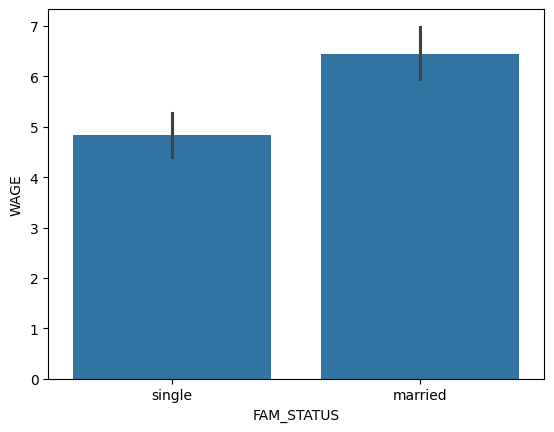

In [63]:
sns.barplot(x='FAM_STATUS', y='WAGE', data=wage)


*AGRUPADOS*

<Axes: xlabel='FAM_STATUS', ylabel='WAGE'>

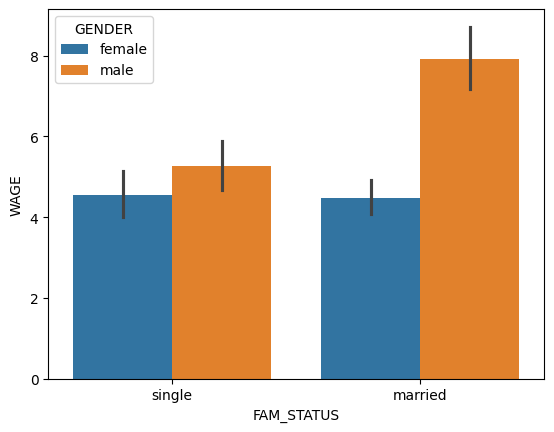

In [86]:
sns.barplot(x='FAM_STATUS', y='WAGE', hue='GENDER', data=wage)

In [73]:
!pip install wbgapi
import wbgapi as wb

**DISTRIBUCIÓN**

<Axes: xlabel='TENURE', ylabel='WAGE'>

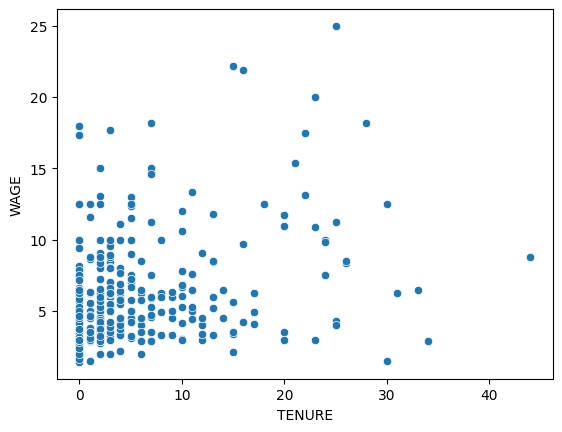

In [76]:
sns.scatterplot(x='TENURE', y='WAGE', data=wage)

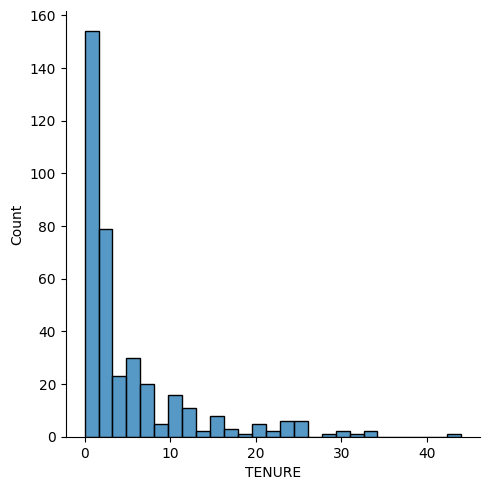

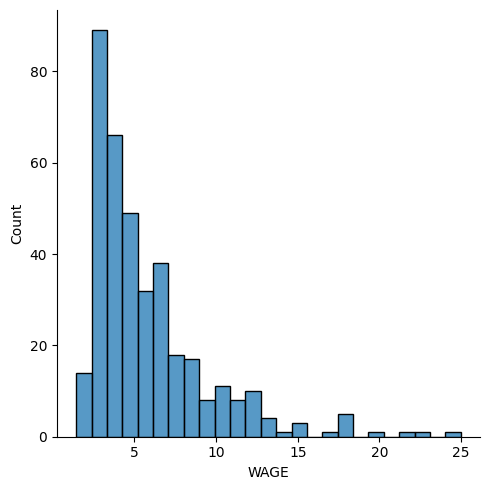

In [81]:
sns.displot(wage['TENURE'])

sns.displot(wage['WAGE'])

*MULTIPLES DISTRIBUCIONES*

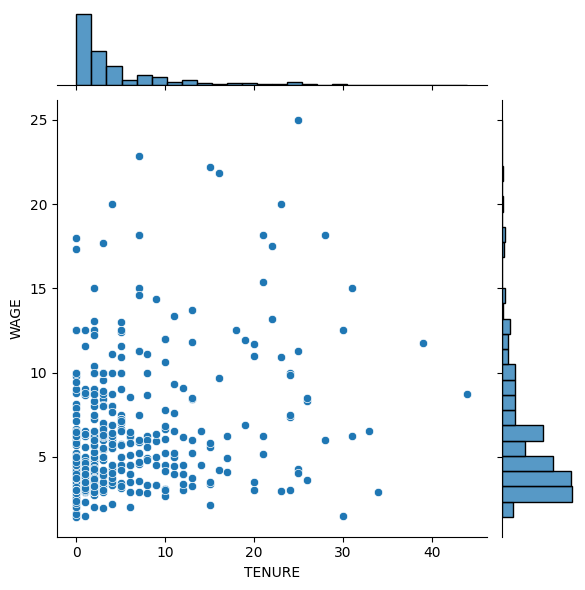

In [84]:
sns.jointplot(y=df['WAGE'],x=df['TENURE'])

<Axes: xlabel='FAM_STATUS', ylabel='WAGE'>

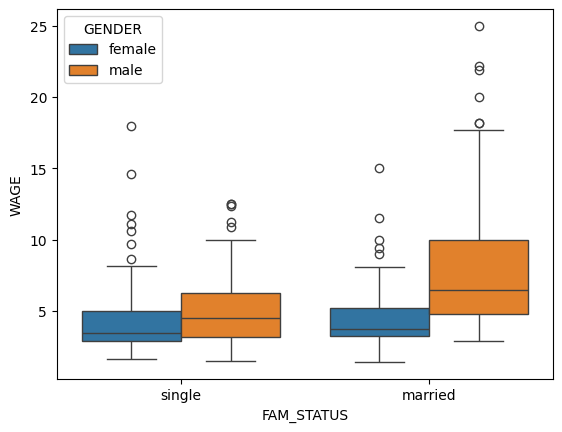

In [88]:
sns.boxplot(data=wage, x='FAM_STATUS', y='WAGE', hue='GENDER')